<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/PSO_despacho_3Generadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
#==

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Funcion objetivo (minimizar)
def fmin(P,PD,a,b,c,Pb):
  ng = len(P)
  fj = [] #Funciones Costos
  for j in range(0,len(P[0])):
    cosij = 0
    Sg = 0
    viol = 0
    for i in range(0,ng):
      cosij = c[i]*((P[i][j])**2) + b[i]*P[i][j] + a[i] + cosij  #Función Objetivo a minimizar 
      Sg = P[i][j] + Sg
      if P[i][j] < Pb[i][0] or Pb[i][1] < P[i][j]:
          viol = viol + 1
    if  Sg < 0.99*PD or Sg > 1.01*PD: # Rango de Tolerancia 
      violacion1 = 1
    else:
      violacion1 = 0
    f_costos = cosij + 1000000000000*(violacion1+viol)
    fj.append(f_costos)
  return fj

In [4]:
def ejecutar_despacho(PD,hh):
    # Pmin - Pmax
    P1b = [10,1000] # MW
    P2b = [10,1000] # MW
    P3b = [10,1000] # MW
    Pb = [P1b, P2b, P3b]
    ## Coeficientes de funcion de costos
    a = [64.67, 65.46, 190.92]
    b = [795.5, 1448.6, 838.1]
    c = [1.15, 0.82, 1.53, 2.46]
    # Incializar particulas
    n_particles = 500# 3000 antes
    min = 0
    max = 1000
    nng = len(a) #Numero de Generadores
    X = np.random.rand(nng, n_particles) * (max - min) + min #Posición aleatoria de Particulas
    V = np.random.randn(nng, n_particles) * 0.01 #Velocidad aleatoria inicial de Particulas
    # Pbest y Gbest -> Inicial:
    pbest = X 
    f_0 = np.array(fmin(X,PD,a,b,c,Pb)) 
    min_v = f_0.min() # encontrar el minimo valor
    ind_min = np.where(f_0 == min_v)[0][0]
    gbest = X[:,ind_min] # coordenada para g best en el plano
    #Hiperparametros
    c1 = 0.1
    c2 = 0.2
    w = 0.02
    n = 2000 # cant. max de iteraciones
    j = 1 #contador que inicia en 0
    Conv_t = []
    while True:
        r = np.random.rand(2) # [r1 r2] 
        r1 = r[0] ; r2 = r[1] 
        V = w*V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1) - X) #Función de actualización de velocidad de PSO
        X = X + V
        f_k = np.array(fmin(X,PD,a,b,c,Pb))
        for i in range(0,n_particles):
            if f_k[i] < f_0[i]:
                pbest[:,i] = X[:,i]
        f_gbest = np.array(fmin(pbest,PD,a,b,c,Pb))
        min_ant = min_v
        Conv_t.append(min_ant)
        min_v = f_gbest.min() # encontrar el minimo
        ind_min = np.where(f_gbest == min_v)[0][0] # el lugar donde esta el minimo
        gbest = pbest[:,ind_min] # coordenada para g best
        f_0 = f_k 
        j = j + 1
        if j >= n or abs(min_v - min_ant) < 1e-6: #Fin While
            Conv_t.append(min_v)
            break
    plt.plot(Conv_t, 'o-')
    plt.xticks(np.arange(0, len(Conv_t), 1))
    plt.grid()
    plt.title('Funcion de costo en hora ' + str(hh) )
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo [$]')
    plt.show()
    return gbest

1013.506


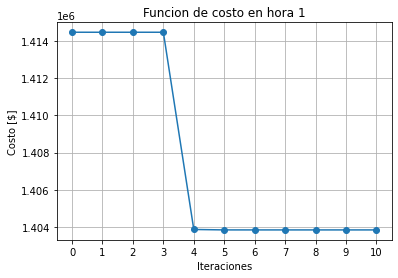

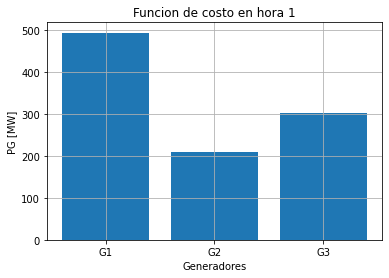

1004.2685111964721
976.565


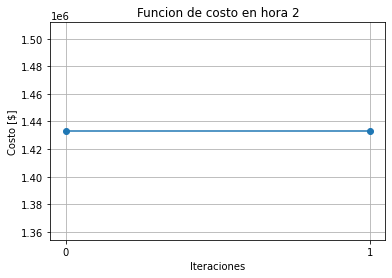

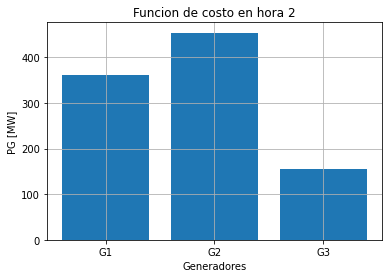

971.450671148586
957.746


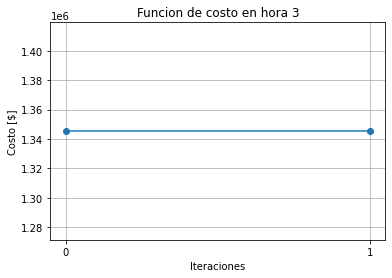

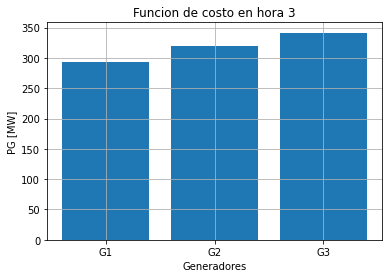

955.0643810928004
954.244


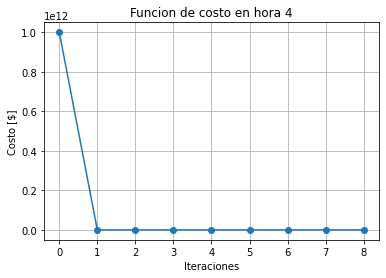

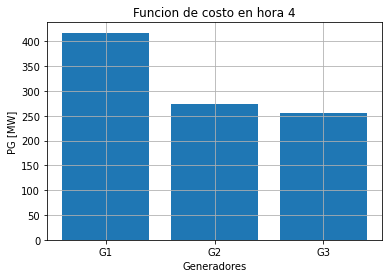

946.8002633673882
985.864


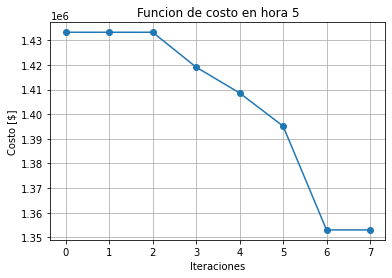

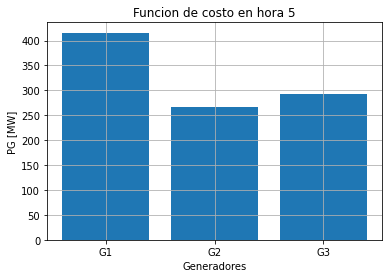

976.3243817641168
1068.756


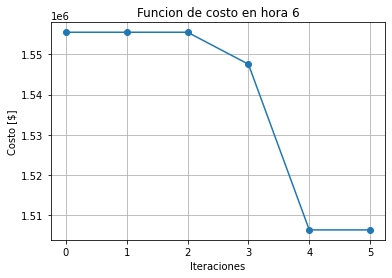

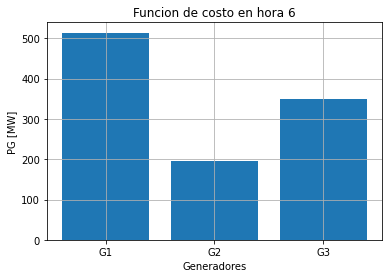

1058.5046641432946
1121.099


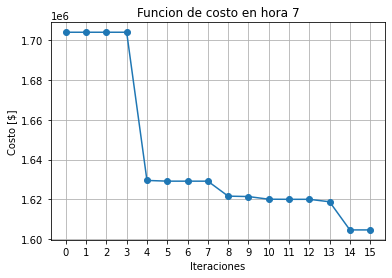

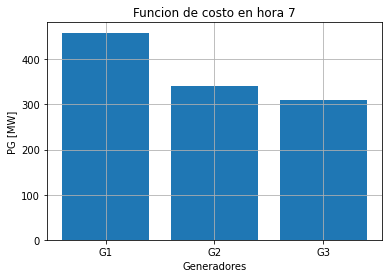

1110.417118643301
1203.345


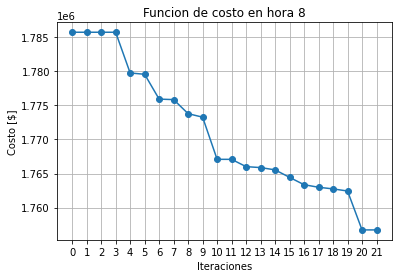

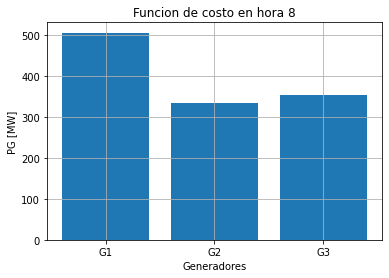

1191.80413956639
1291.66


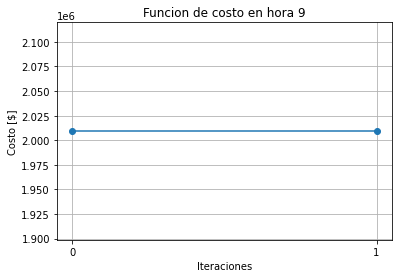

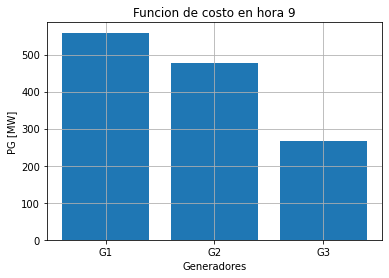

1300.14373664214
1356.6


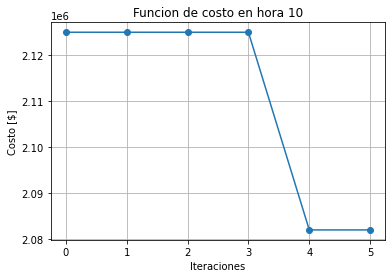

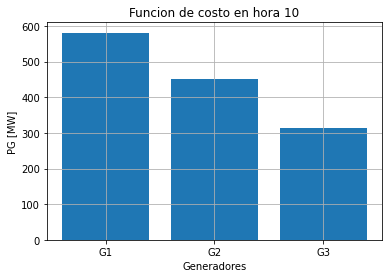

1344.614437831018
1407.396


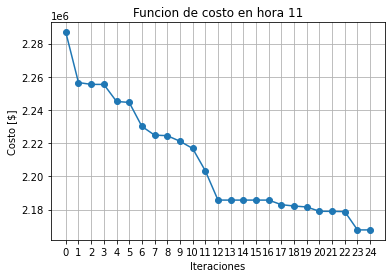

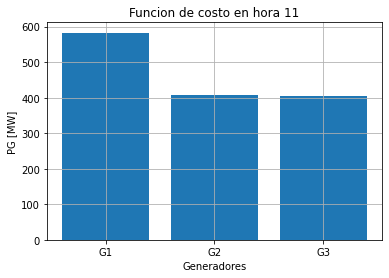

1393.5380017668567
1444.813


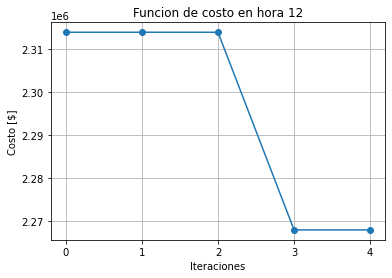

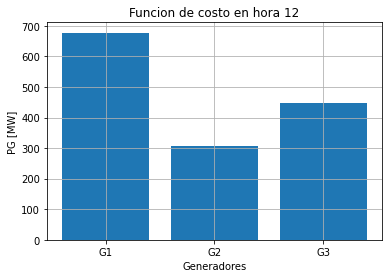

1430.7054018138283
1410.796


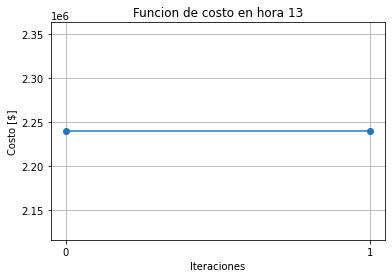

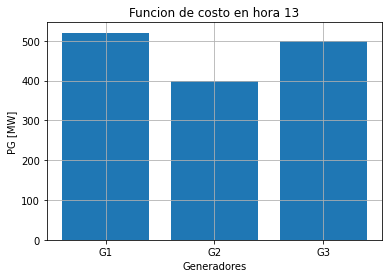

1421.2459864430207
1407.26


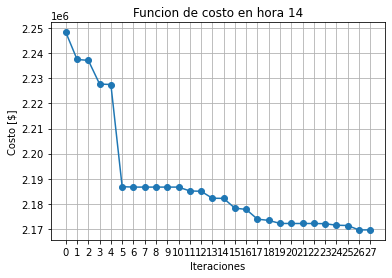

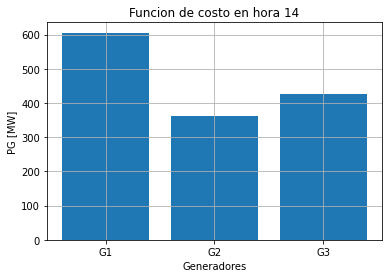

1393.239430914401
1429.003


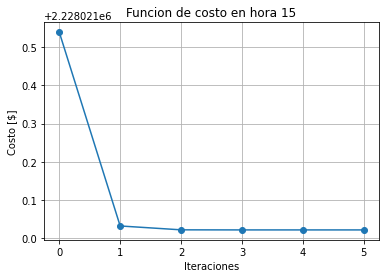

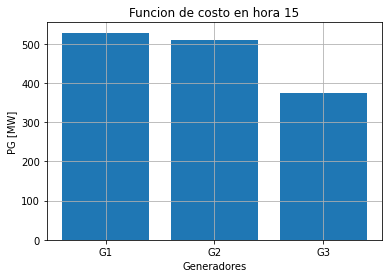

1415.6501205858708
1428.884


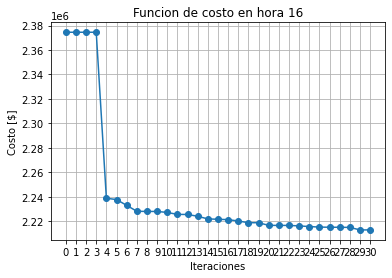

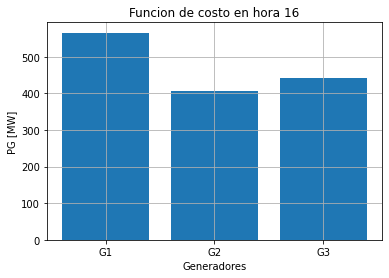

1414.6014131188463
1419.857


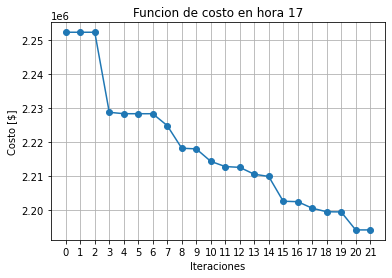

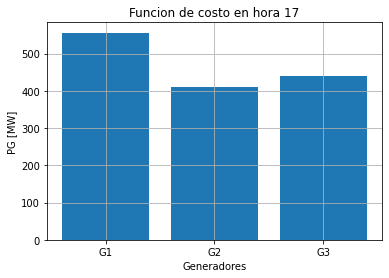

1405.7561587792686
1417.885


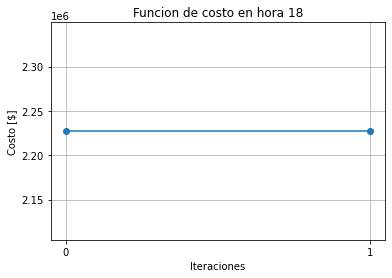

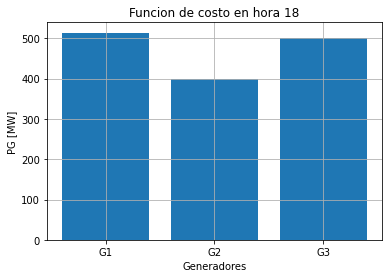

1414.7555554540943
1591.081


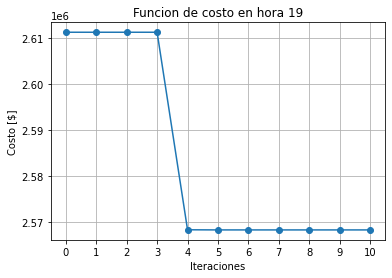

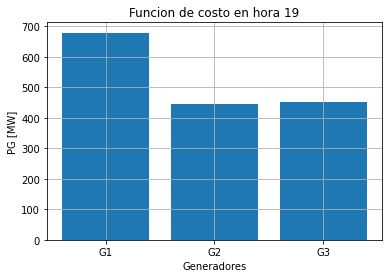

1575.6156312474134
1598.272


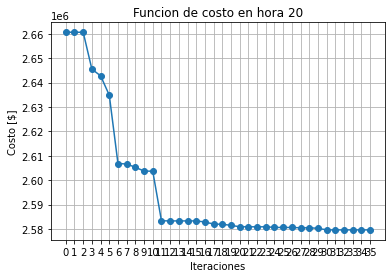

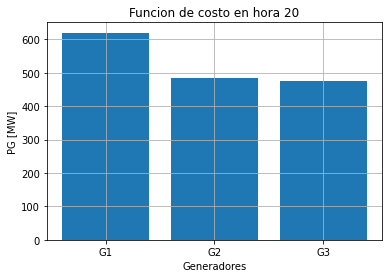

1582.3085924591308
1547.629


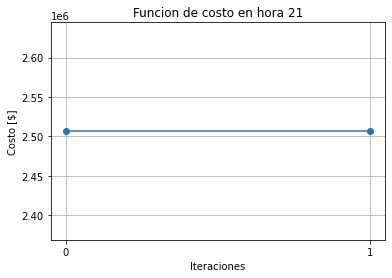

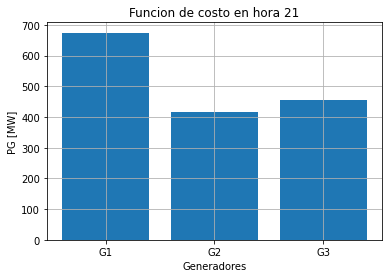

1547.3649998796097
1392.487


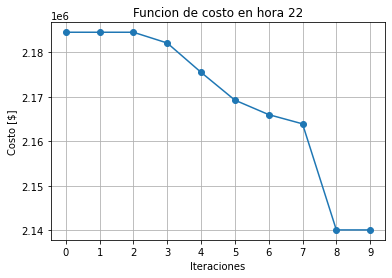

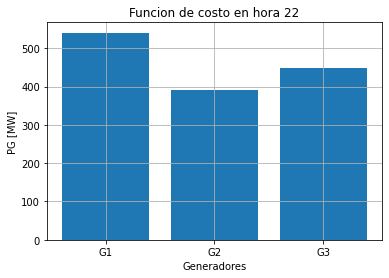

1379.2648872137834
1250.486


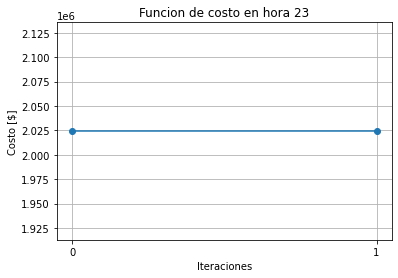

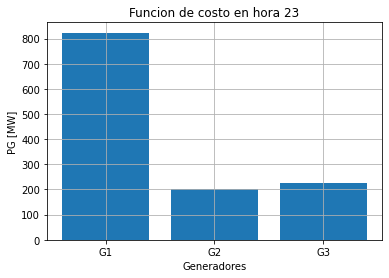

1248.9051052972954
1122.306


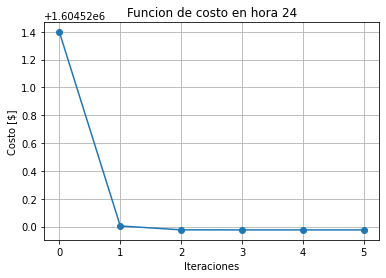

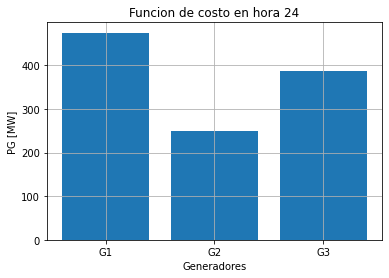

1112.0344886182756
[1004.2685111964721, 971.450671148586, 955.0643810928004, 946.8002633673882, 976.3243817641168, 1058.5046641432946, 1110.417118643301, 1191.80413956639, 1300.14373664214, 1344.614437831018, 1393.5380017668567, 1430.7054018138283, 1421.2459864430207, 1393.239430914401, 1415.6501205858708, 1414.6014131188463, 1405.7561587792686, 1414.7555554540943, 1575.6156312474134, 1582.3085924591308, 1547.3649998796097, 1379.2648872137834, 1248.9051052972954, 1112.0344886182756]


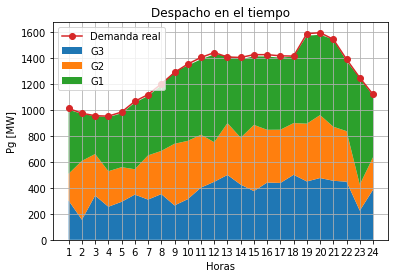

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Despacho_PSO/demanda.xlsx', header=None)
nd = len(df[0])
Gen_t = []
Val_gen = []
G1 = []
G2 = []
G3 = []
for i in range(nd):
    demanda_i = df[0][i]
    print(demanda_i)
    Xgen = ejecutar_despacho(demanda_i,i+1)
    G1.append(Xgen[0])
    G2.append(Xgen[1])
    G3.append(Xgen[2])

    plt.bar(['G1','G2','G3'],[Xgen[0],Xgen[1],Xgen[2]])
    plt.title('Funcion de costo en hora ' + str(i+1))
    plt.xlabel('Generadores')
    plt.ylabel('PG [MW]')
    plt.grid()
    plt.show()
    
    Gen_t.append(Xgen)
    Val_gen.append(sum(Xgen))
    print(sum(Xgen))

print(Val_gen)

x=range(1,25)
plt.stackplot(x,G3,G2,G1,labels=['G3','G2','G1'])
plt.plot(x, df[0],'-o',label='Demanda real')
plt.legend(loc='upper left')
plt.xticks(np.arange(1, 25, 1))
plt.grid()
plt.title('Despacho en el tiempo')
plt.xlabel('Horas')
plt.ylabel('Pg [MW]')
plt.show()